## K-Means: Ejercicio 2

Análisis de rasgos de personalidad en Twitter

Descripción:

* 140 famosos del mundo en diferentes áreas: deportes, cantantes, actores
* Con base a la metodología de psicología "The Big Five" se obtienen las características de entrada

Tarea:

* Aplicar K-Means para agrupar los usuarios por similitud de personalidad

## Diccionario de datos

#### Librerías a utilizar

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Cargar el archivo plano

In [8]:
# Se cargan los datos
dataframe = pd.read_csv("data/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [9]:
# Se muestran las estadísticas
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [10]:
# Se muestran los registros para cada categoría
dataframe.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

#### Visualización de Datos

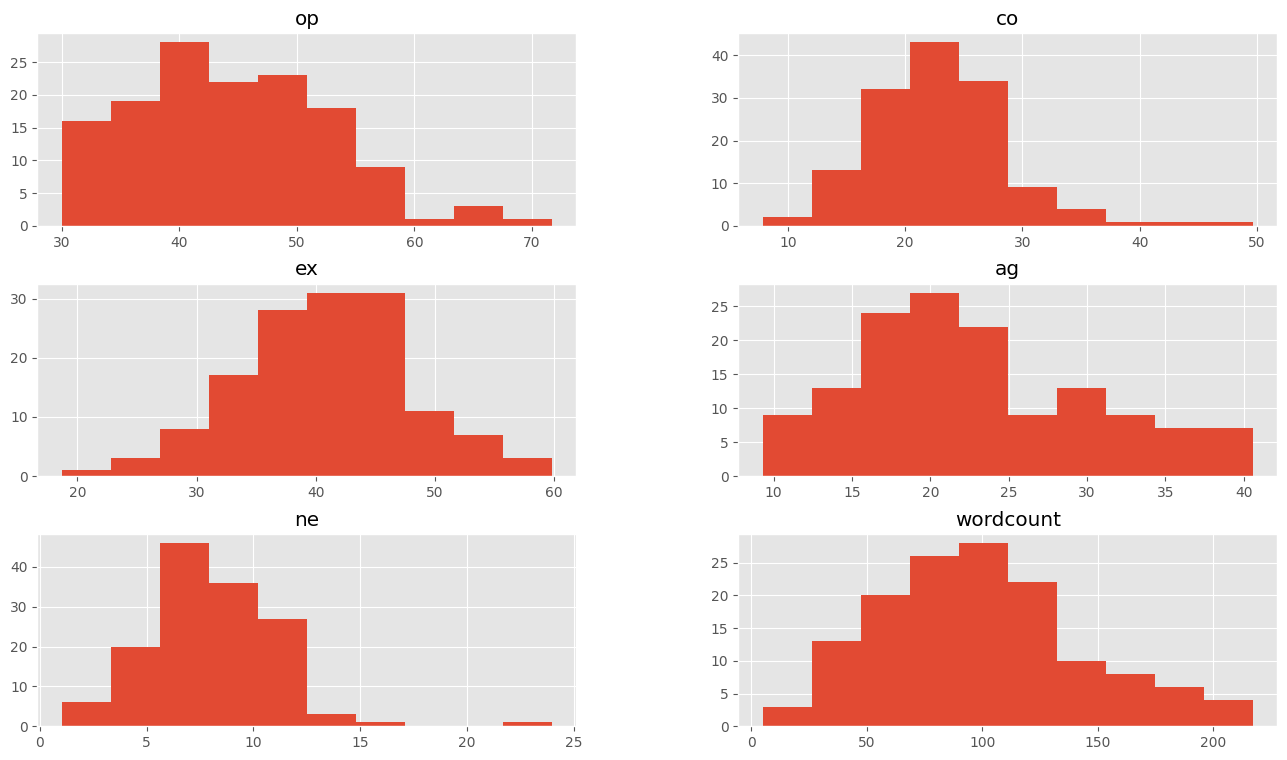

In [11]:
# Se genera un histograma para ver la distribución de los datos
dataframe.drop(['categoria'], axis= 1).hist()
plt.show()

#### Definimos las entradas

In [12]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])

#### Obtenemos el valor de K

c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

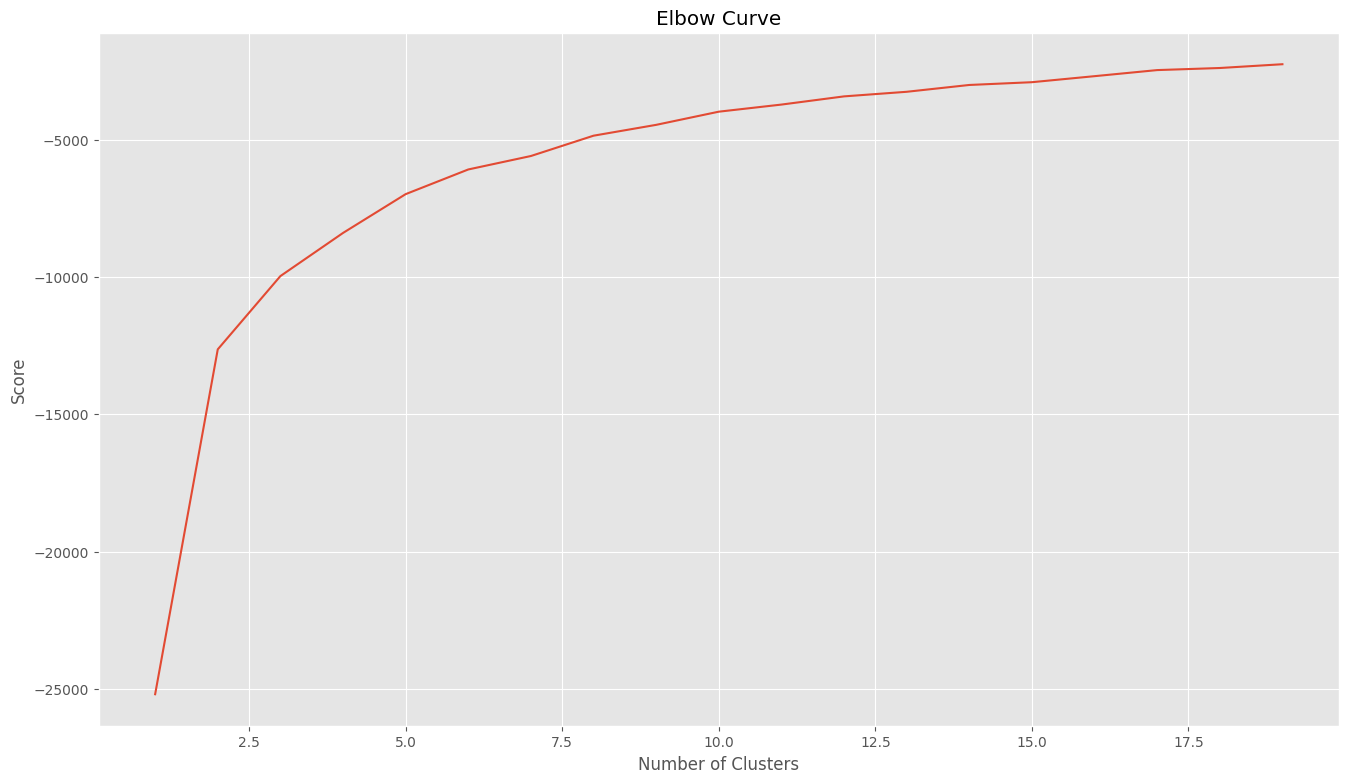

In [13]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### K-Means

In [14]:
# Se define el modelo
kmeans = KMeans(n_clusters=5).fit(X)
# Se idnetifican los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[35.90241306 47.56828232 33.58748762]
 [50.58986955 40.33673957 17.37205086]
 [60.35359892 30.299381   15.71781133]
 [40.25290633 43.17698036 23.18128036]
 [43.15774021 31.95380668 20.17880047]]


c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Grupos

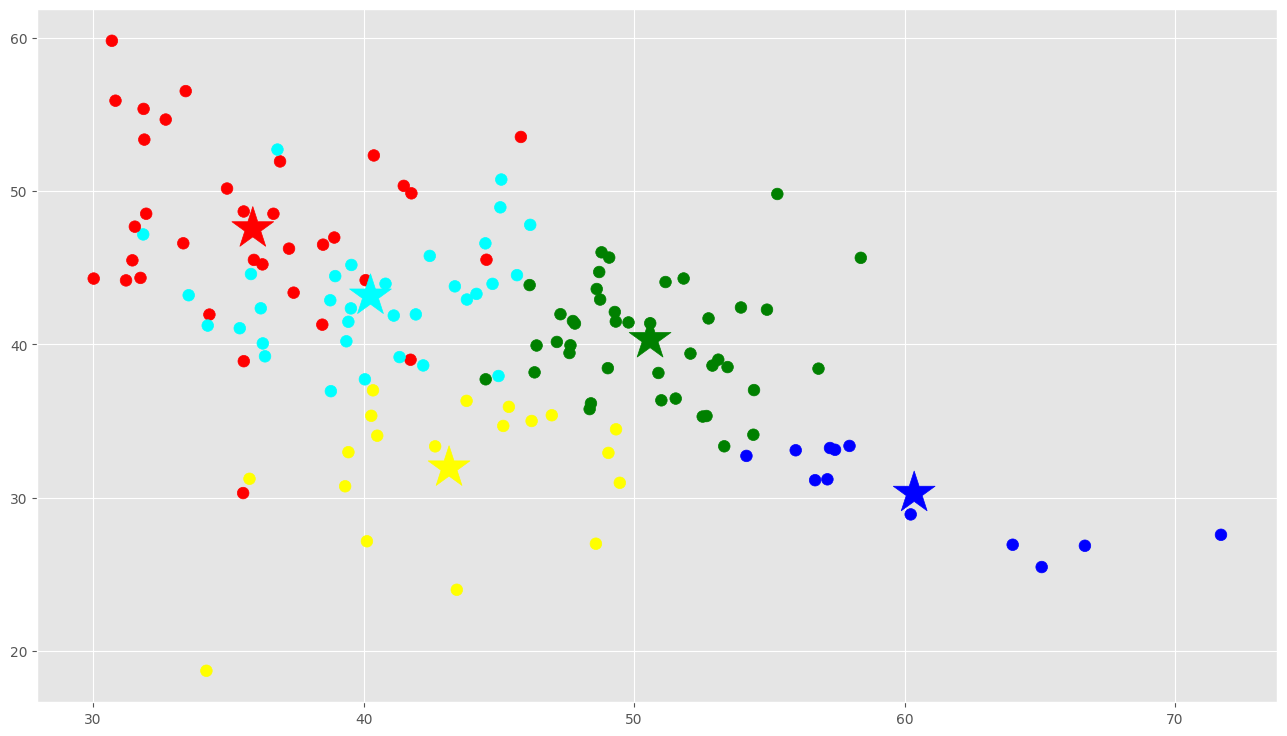

In [15]:
# Se crean los grupos
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

#### Observar clustering por grupos

In [16]:
# Se observa la cantidad de elementos por cluster
copy = pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,34
1,green,42
2,blue,12
3,cyan,33
4,yellow,19


#### Clasificar una nuevo cliente

In [17]:
# op = 45.92
# ex = 57.74
# ag = 15.66
X_new = np.array([[45.92,57.74,15.66]]) 

# Se genera la predicción
new_labels = kmeans.predict(X_new)

# El cluster al que pertenece el usuario
print(new_labels)

[3]
